### Plotting UCSD/Penn/Princeton ROX Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.interpolate import interp1d
import scipy.optimize as optimize
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = [10, 6]

## Princeton Data (X-003 Data vs Oxford Sensor on MXC); x003 is LS calibrated, and a recal file was never sent to Pton for it

In [2]:
x003_pton = [66.2,75.1,83.8,87.9,92.1,96.3,100.3,104.2,108.5,112.7,117.1,121.4,125.7,130.2,134.3,138.9,143.1,147.5,151.8,156.2,160.4,164.8,169,173.3,177.6,186.1,194.6,203.2]
oxford = [58.9,67.8,77.1,81.9,86,90.5,94.9,99.4,104,108,112,116,121,125,129,133,137,141,145,149,153,157,161,165,169,178,186,194]

In [3]:
x = np.arange(0,225)

## UCSD Data (X020 on MXC vs their BF); X020 is calibrated using X002 BF recal

In [4]:
ucsd_bf = [48, 54.7,61.9,66.2,71.3,77.5,82.3,85,89.2,93.3,100.5,102.7,104.7,108.1,115.5,117.3,119.1,121.3,124.2] #[48
x020_ucsd = [58.1, 66.3,73,79.3,85.1,90.6,95.9,100.8,105.6,110.2,114.6,118.8,123,127,131.1,134.8,138.5,141.9,145.2] #[58.1

#got data points from averaging stepped data from aug 2019 k2so data
# x002 data is LS calibrated data from Yale
x002_ucsd = [116, 121.5, 126.8, 132.1,137.5,142.9,148.4, 153.7,159,164.3,169.5, 174.9, 180.3, 185.7, 191.1, 196.4, 201.9]# 207.3]
x002_ucsd_bf = [114.9, 119.9, 124.9, 130.1, 135.3, 140.4, 144.9, 149.9, 154.4, 159.5, 165.6, 169.8, 174.9, 180, 185.2, 189.9, 194.9]

## Penn Cooldown Data (LS rox X-147 and X-040 BF servo cal'd)

In [5]:
#cooldown data
ls_penn_x147 = [186.5,165.6,150.2,135.2,116.8,105,96.3,87.1,80.5,75.6,72.2,69,67.2,64.1,59.7,57.1,54.2,50.8,50,48.4]
x040_penn = [201.4,177,159.3,142.3,121.7,108.7,98.1,90.1,83.3,77.4,74.2,71.9,69.7,67.5,63.4,61.2,58.6,56.2,55.5,54]

#x040 servo data 
ls_penn_x147_servo = [45.6, 102.8, 115.8, 127.2, 136.2, 147, 157.7, 174, 184.8]
x040_penn_servo = [51.9, 103.5, 117.2, 129.6, 139.8, 151.9, 164.5, 183.5, 196]


## Penn Cooldown Data (X-099 recal against their BF rox on MXC); x-099 only read out down to 90mK and then stopped so not sure why, it should be able to go down much lower

In [6]:
bf_penn = [198.5,164.7,148.7,122.6,104.7,94.6]
x099_recal_penn = [197.5,177,143,120.1,108.7,89.6]

## Yale LS ROX at Pton 

In [7]:
oxford_lscal = [52.4,62.03,72.28,83.65,94.34,104.8,115,124,134.1,143.1,152.5,162.7,172,182,191]
ls_cal_pton = [60,70,80,90,100,110,120,130,140,150,160,170,180,190.4,200]

## BF/LS servo from 01/27/2021 data to find slope

In [8]:
bfservo = [50,60,70,80,90,110,110,120,130,140,150,160,170,180,190,200]
lsservo = [52,64,74.6,83.5,92.3,100.8,109.2,118.3,127.3,135.7,144.8,153.7,162.3,170.8,179.5,188.2]

## Princeton Data (X-114 Recal'd vs Oxford Sensor on MXC)

In [9]:
oxford_x114 = [58.9,67.8,77.1,81.9,86,90.5,94.9,99.4,104,108,112,116,121,125,129,133,137,141,145,149,153,157,161,165,169,178,186,194]
x114_pton = [61.2,70.3,80.4,85.6,90.6,95.5,100.6,105.5,110.5,115.4,120.6,125.5,130.5,135.4,140.3,145.5,150.4,155.4,160.4,165.5,170.4,175.5,180.4,185.4,190.5,200.5,210.6,220.4]
len(x114_pton)

28

# Plotting All Institutions' Data

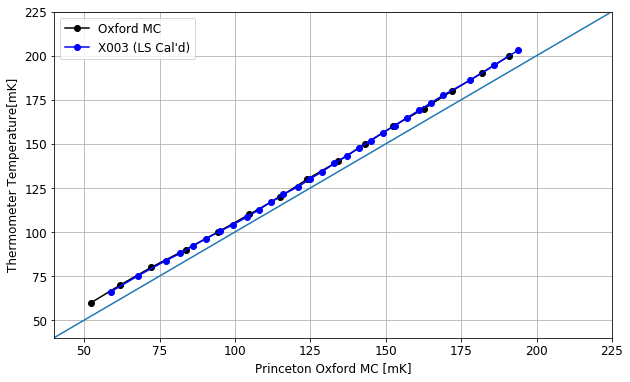

In [10]:
plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Oxford MC")
plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "X003 (LS Cal'd)")
#plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
#plt.plot(ucsd_bf, x020_ucsd, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd) & BF MC")
#plt.plot(x002_ucsd_bf, x002_ucsd, 'o-', color = 'darkolivegreen', label = "UCSD: X002 LS (Cal'd) & BF MC ")
#plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX Cooldown")
#plt.plot(ls_penn_x147_servo, x040_penn_servo, 'o-', color = 'saddlebrown', label = "Penn: X040 (BF Cal'd) & LS ROX Servo")
#plt.plot(bf_penn,x099_recal_penn, 'o-', color ='orange', label = "Penn: X099 (BF Recal'd) & BF MC")

plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Thermometer Temperature[mK]')
plt.xlabel('Princeton Oxford MC [mK]')
plt.legend()

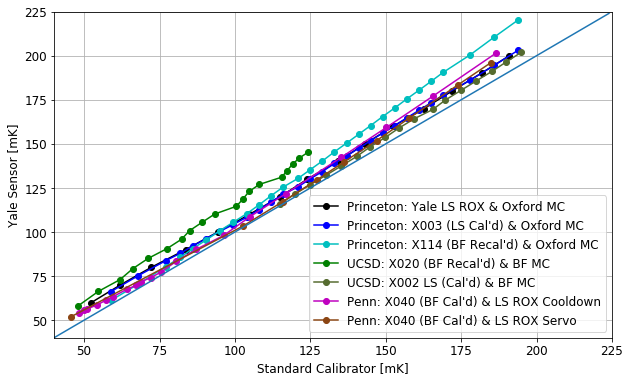

In [11]:
plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Princeton: Yale LS ROX & Oxford MC")
plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "Princeton: X003 (LS Cal'd) & Oxford MC")
plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
plt.plot(ucsd_bf, x020_ucsd, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd) & BF MC")
plt.plot(x002_ucsd_bf, x002_ucsd, 'o-', color = 'darkolivegreen', label = "UCSD: X002 LS (Cal'd) & BF MC ")
plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX Cooldown")
plt.plot(ls_penn_x147_servo, x040_penn_servo, 'o-', color = 'saddlebrown', label = "Penn: X040 (BF Cal'd) & LS ROX Servo")
#plt.plot(bf_penn,x099_recal_penn, 'o-', color ='orange', label = "Penn: X099 (BF Recal'd) & BF MC")

plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend()

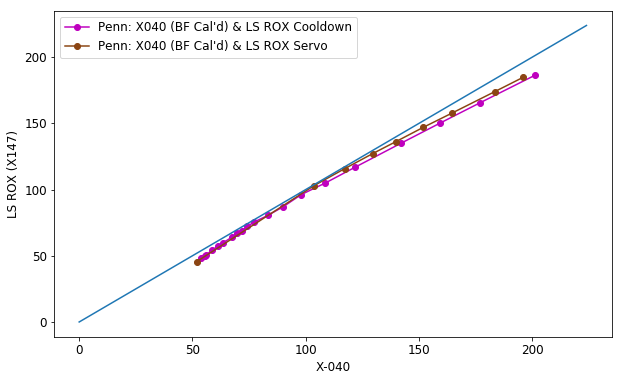

In [12]:
plt.plot(x040_penn, ls_penn_x147,'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX Cooldown")
plt.plot(x040_penn_servo, ls_penn_x147_servo,'o-', color = 'saddlebrown', label = "Penn: X040 (BF Cal'd) & LS ROX Servo")
plt.xlabel("X-040")
plt.ylabel("LS ROX (X147)")
plt.legend()
plt.plot(x,x)

No handles with labels found to put in legend.


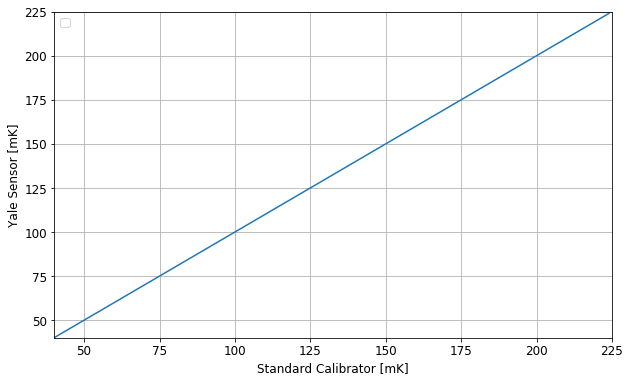

In [13]:
#plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Princeton: Yale LS ROX & Oxford MC")
#plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "Princeton: X003 (LS Cal'd) & Oxford MC")
#plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
#plt.plot(ucsd_bf, x020_ucsd, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd) & BF MC")
#plt.plot(x002_ucsd_bf, x002_ucsd, 'o-', color = 'darkolivegreen', label = "UCSD: X002 (LS Cal'd) & BF MC ")
#plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX Cooldown")
#plt.plot(ls_penn_x147_servo, x040_penn_servo, 'o-', color = 'saddlebrown', label = "Penn: X040 (BF Cal'd) & LS ROX Servo")
#plt.plot(bf_penn,x099_recal_penn, 'o-', color ='orange', label = "Penn: X099 (BF Recal'd) & BF MC")

plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend()

## Residuals for the Above

In [14]:
x020_ucsd = np.array(x020_ucsd)
ucsd_bf = np.array(ucsd_bf)
x002_ucsd_bf = np.array(x002_ucsd_bf)
x002_ucsd = np.array(x002_ucsd)
ls_penn_x147 = np.array(ls_penn_x147)
x040_penn = np.array(x040_penn)
ls_penn_x147_servo = np.array(ls_penn_x147_servo)
x040_penn_servo = np.array(x040_penn_servo)
oxford_x114 = np.array(oxford_x114)
x114_pton = np.array(x114_pton)
x003_pton = np.array(x003_pton)
oxford = np.array(oxford)
oxford_lscal = np.array(oxford_lscal)
ls_cal_pton = np.array(ls_cal_pton)

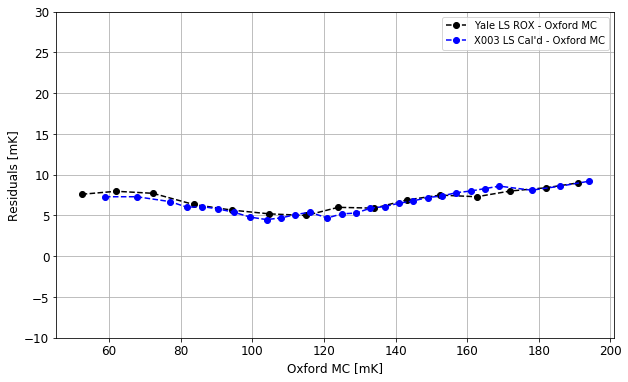

In [15]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o--', color = 'k', label = "Yale LS ROX - Oxford MC")
plt.plot(oxford, x003_pton - oxford, 'o--', color = 'b', label = "X003 LS Cal'd - Oxford MC")
#plt.plot(oxford_x114, x114_pton - oxford_x114, 'o--', color = 'c', label = "X114 BF Inferred - Oxford MC")
#plt.plot(ucsd_bf, x020_ucsd-ucsd_bf, 'o--', color = 'g', label = "UCSD: X020 BF Cal'd - UCSD BF MC")
#plt.plot(x002_ucsd_bf, x002_ucsd-x002_ucsd_bf, 'o--', color = 'darkolivegreen', label = "UCSD: X002 LS Cal'd - UCSD BF MC")
#plt.plot(ls_penn_x147, x040_penn-ls_penn_x147, 'o--', color = 'm', label = "Penn: X040 BF Cal'd - LS ROX (Cooldown)")
#plt.plot(ls_penn_x147_servo, x040_penn_servo-ls_penn_x147_servo, 'o-', color = 'saddlebrown', label = "Penn: X040 BF Cal'd - LS ROX (Servo)")

plt.grid()
plt.xlabel('Oxford MC [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best', fontsize = 10)

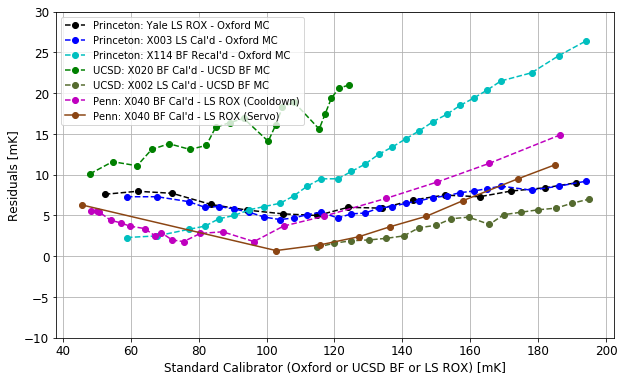

In [15]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o--', color = 'k', label = "Princeton: Yale LS ROX - Oxford MC")
plt.plot(oxford, x003_pton - oxford, 'o--', color = 'b', label = "Princeton: X003 LS Cal'd - Oxford MC")
plt.plot(oxford_x114, x114_pton - oxford_x114, 'o--', color = 'c', label = "Princeton: X114 BF Recal'd - Oxford MC")
plt.plot(ucsd_bf, x020_ucsd-ucsd_bf, 'o--', color = 'g', label = "UCSD: X020 BF Cal'd - UCSD BF MC")
plt.plot(x002_ucsd_bf, x002_ucsd-x002_ucsd_bf, 'o--', color = 'darkolivegreen', label = "UCSD: X002 LS Cal'd - UCSD BF MC")
plt.plot(ls_penn_x147, x040_penn-ls_penn_x147, 'o--', color = 'm', label = "Penn: X040 BF Cal'd - LS ROX (Cooldown)")
plt.plot(ls_penn_x147_servo, x040_penn_servo-ls_penn_x147_servo, 'o-', color = 'saddlebrown', label = "Penn: X040 BF Cal'd - LS ROX (Servo)")

plt.grid()
plt.xlabel('Standard Calibrator (Oxford or UCSD BF or LS ROX) [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best', fontsize = 10)

### Supplemental Plots of the above because hard to nitpick with everything

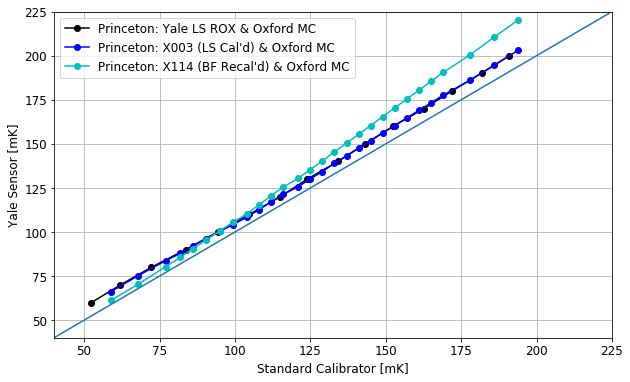

In [16]:
## all the princeton data
plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Princeton: Yale LS ROX & Oxford MC")
plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "Princeton: X003 (LS Cal'd) & Oxford MC")
plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend()

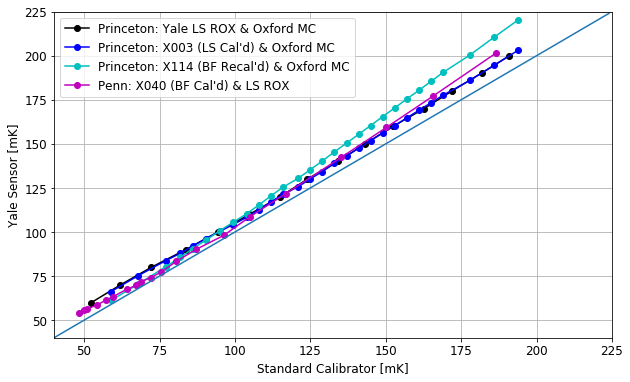

In [17]:
## pton BF data,our LS vs OXford,  plus penn x040
plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Princeton: Yale LS ROX & Oxford MC")
plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "Princeton: X003 (LS Cal'd) & Oxford MC")
plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX")
plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend()

# BF -> LS Conversion (using the servo data from Jan 2021)

In [18]:
#do a polyfit to the LS vs BF 
#y is the LS and x is the BF temperatures
#and then do the same thing for x040 bc this is calibrated against the actual
#also do the same with x020?
#answer to Tran: at pton and penn, compared to LS or oxford, we seem to be offset. 
#when we compare anything to BF, it seems to be variable; which is true during our hand-heater servos, 
#the BF seemed it was the one to blame (look at slide 15 and 16 on slide dump)
#x020 doesn't look like the other plots so looking at x002 would be nice to see if it matches with any other uni's


In [19]:
lsbf_slopefit = np.polyfit(bfservo,lsservo,1)
print(lsbf_slopefit)
#slope is first, offset is second term


#polyfit_cooldown = np.polyfit(np.log10(interpolated_bftemps_x129), np.log10(x129res), 4)




[0.89409116 9.99229767]


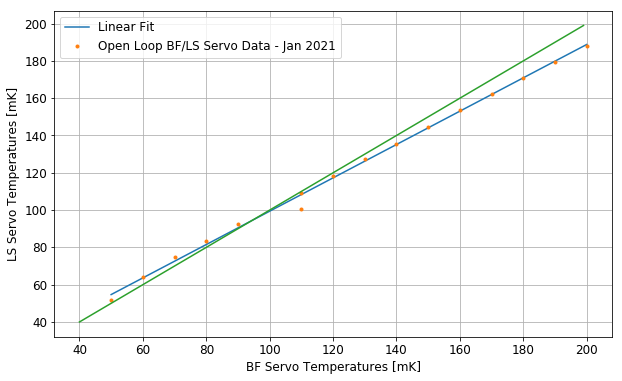

In [20]:
#polyfit_cooldown = np.polyfit(np.log10(interpolated_bftemps_x129), np.log10(x129res), 4)
p = np.poly1d(lsbf_slopefit)
p_eval = p(np.arange(np.min(bfservo), np.max(bfservo), 0.001))
plt.plot(np.arange(np.min(bfservo), np.max(bfservo), 0.001), p_eval, label = 'Linear Fit')
plt.plot(bfservo, lsservo, '.', label = 'Open Loop BF/LS Servo Data - Jan 2021')
plt.legend()
plt.grid()
plt.xlabel('BF Servo Temperatures [mK]')
plt.ylabel('LS Servo Temperatures [mK]')
x = np.arange(40, 200)
plt.plot(x,x)

In [21]:
x020_lstemps = []
for i in range(0, len(x020_ucsd)):
    lstemps = lsbf_slopefit[0]*x020_ucsd[i] + lsbf_slopefit[1]
    x020_lstemps.append(lstemps)

In [22]:
x040_lstemps = []
for i in range(0, len(x040_penn)):
    lstemps = lsbf_slopefit[0]*x040_penn[i] + lsbf_slopefit[1]
    x040_lstemps.append(lstemps)

#applying slope and offset for x040 servo data
x040_lstemps_servo = []
for i in range(0, len(x040_penn_servo)):
    lstemps_servo = lsbf_slopefit[0]*x040_penn_servo[i] + lsbf_slopefit[1]
    x040_lstemps_servo.append(lstemps_servo)

In [23]:
x114_lstemps = []
for i in range(0,len(x114_pton)):
    lstemps = lsbf_slopefit[0]*x114_pton[i] + lsbf_slopefit[1]
    x114_lstemps.append(lstemps)

In [24]:
 
# applying the slope and offset for X-114 from the cooldown data that X-114 was in 3rd order fit
x114_oct2019_lstemps = []
for i in range (0, len(x114_pton)):
    lstemps_oct2019 = -3.86115009e-8*(x114_pton[i]**3) + 2.36963394e-4*(x114_pton[i]**2) + .771613004*(x114_pton[i]) + 22.9607575 
    x114_oct2019_lstemps.append(lstemps_oct2019)
    
# applying the slope and offset for X-114 from the second servo data from oct 2019 cooldown
x114_oct2019_servo2_lstemps = []
for i in range(0,len(x114_pton)):
    lstemps_servo2 = 1.0886449*x114_pton[i] -27.54981966
    x114_oct2019_servo2_lstemps.append(lstemps_servo2)

# applying slope and offset for first servo data from oct 2019
x114_oct2019_servo1_lstemps = []
for i in range(0,len(x114_pton)):
    lstemps_servo1 = 2.28223478*x114_pton[i] -49.68230935
    x114_oct2019_servo1_lstemps.append(lstemps_servo1)
  

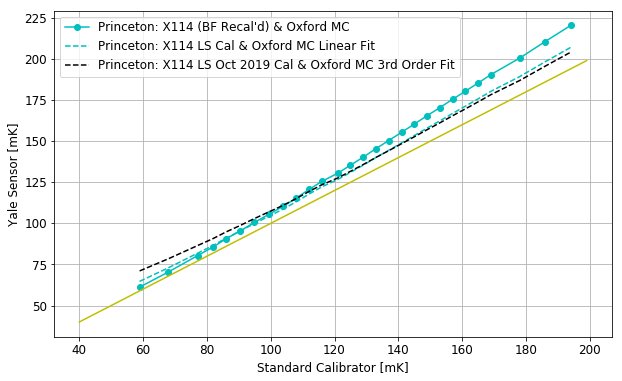

In [25]:
plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
plt.plot(oxford_x114, x114_lstemps, '--', color = 'c', label = "Princeton: X114 LS Cal & Oxford MC Linear Fit")
plt.plot(oxford_x114, x114_oct2019_lstemps, '--', color = 'k', label = "Princeton: X114 LS Oct 2019 Cal & Oxford MC 3rd Order Fit")

## THE BAD ONES
#plt.plot(oxford_x114, x114_oct2019_servo2_lstemps, '--', color = 'm', label = "Pton: X114 LS Oct 2019 Servo 2 & Oxford MC")
#plt.plot(oxford_x114, x114_oct2019_servo1_lstemps, '--', color = 'darkslateblue', label = "Pton: X114 LS Oct 2019 Servo 1 & Oxford MC")
plt.plot(x,x, color = 'y')
#plt.xlim(40,225)
#plt.ylim(40,225)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend()

Note that the linear fit for X-114 above is not a linear fit of Oct 2019 data, but a linear fit of the open loop test
from Jan 2021

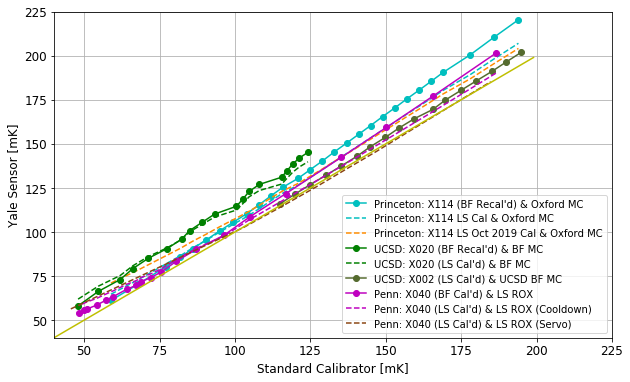

In [26]:
plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
plt.plot(oxford_x114, x114_lstemps, '--', color = 'c', label = "Princeton: X114 LS Cal & Oxford MC")
plt.plot(oxford_x114, x114_oct2019_lstemps, '--', color = 'darkorange', label = "Princeton: X114 LS Oct 2019 Cal & Oxford MC")#3rd order fit
plt.plot(ucsd_bf, x020_ucsd, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd) & BF MC")
plt.plot(ucsd_bf, x020_lstemps, '--', color = 'g', label = "UCSD: X020 (LS Cal'd) & BF MC")
plt.plot(x002_ucsd_bf, x002_ucsd, 'o-', color = 'darkolivegreen', label = "UCSD: X002 (LS Cal'd) & UCSD BF MC")
plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX")
plt.plot(ls_penn_x147, x040_lstemps, '--', color = 'm',label = "Penn: X040 (LS Cal'd) & LS ROX (Cooldown)")
plt.plot(ls_penn_x147_servo, x040_lstemps_servo, '--', color = 'saddlebrown', label = "Penn: X040 (LS Cal'd) & LS ROX (Servo)")
plt.plot(x,x, color = 'y')
plt.xlim(40,225)
plt.ylim(40,225)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend(loc = 'best', fontsize = 10)

### Focusing on X040 from Penn

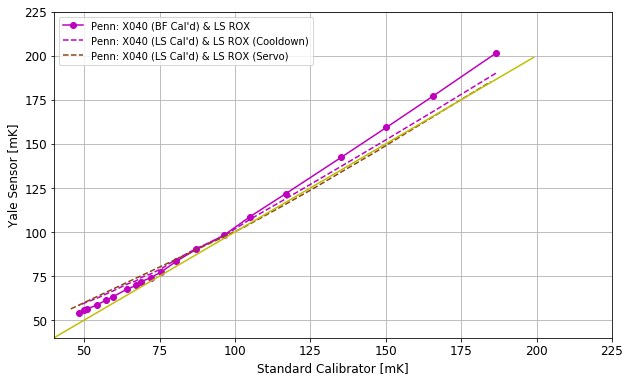

In [27]:
#plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) & Oxford MC")
#plt.plot(oxford_x114, x114_lstemps, '--', color = 'c', label = "Princeton: X114 LS Cal & Oxford MC")
#plt.plot(oxford_x114, x114_oct2019_lstemps, '--', color = 'darkorange', label = "Princeton: X114 LS Oct 2019 Cal & Oxford MC")#3rd order fit
#plt.plot(ucsd_bf, x020_ucsd, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd) & BF MC")
#plt.plot(ucsd_bf, x020_lstemps, '--', color = 'g', label = "UCSD: X020 (LS Cal'd) & BF MC")
plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'm',label = "Penn: X040 (BF Cal'd) & LS ROX")
plt.plot(ls_penn_x147, x040_lstemps, '--', color = 'm',label = "Penn: X040 (LS Cal'd) & LS ROX (Cooldown)")
plt.plot(ls_penn_x147_servo, x040_lstemps_servo, '--', color = 'saddlebrown', label = "Penn: X040 (LS Cal'd) & LS ROX (Servo)")
plt.plot(x,x, color = 'y')
plt.xlim(40,225)
plt.ylim(40,225)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Standard Calibrator [mK]')
plt.legend(loc = 'best', fontsize = 10)

## BF --> LS Conversion Residuals

In [28]:
x020_ucsd = np.array(x020_ucsd)
ucsd_bf = np.array(ucsd_bf)
ls_penn_x147 = np.array(ls_penn_x147)
x040_penn = np.array(x040_penn)
x040_lstemps_servo = np.array(x040_lstemps_servo)
oxford_x114 = np.array(oxford_x114)
x114_pton = np.array(x114_pton)
x114_LS_temps = np.array(x114_LS_temps)
x114_Standard_temps = np.array(x114_Standard_temps)
x003_pton = np.array(x003_pton)
oxford = np.array(oxford)
oxford_lscal = np.array(oxford_lscal)
ls_cal_pton = np.array(ls_cal_pton)
x002_BF_temps = np.array(x002_BF_temps)

NameError: name 'x114_LS_temps' is not defined

In [ ]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o--', color = 'k', label = "Princeton: Yale LS ROX - Oxford MC")
plt.plot(oxford, x003_pton - oxford, 'o--', color = 'b', label = "Pton: X003 LS Cal'd - Oxford MC")
plt.plot(oxford_x114, x114_LS_temps - oxford_x114, 'o--', color = 'r', label = "Pton: X114 True LS Cal - Oxford MC")
plt.plot(ucsd_bf, x020_lstemps-ucsd_bf, '--', color = 'g', label = "UCSD: X020 LS Cal'd - UCSD BF MC")
plt.plot(x002_ucsd_bf, x002_ucsd-x002_ucsd_bf, 'o--', color = 'darkolivegreen', label = "UCSD: X002 LS Cal'd - UCSD BF MC")
plt.plot(ls_penn_x147, x040_lstemps-ls_penn_x147, '--', color = 'm',label = "Penn: X040 LS Cal'd - LS ROX (Cooldown)")
plt.plot(ls_penn_x147_servo, x040_lstemps_servo-ls_penn_x147_servo, '--', color = 'saddlebrown',label = "Penn: X040 LS Cal'd - LS ROX (Servo)")
plt.grid()
plt.xlabel('Standard Calibrator [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best', fontsize = 10)

In [ ]:
plt.plot(oxford_lscal, ls_cal_pton, 'o--', color = 'k', label = "Princeton: Yale LS ROX & Oxford MC")
plt.plot(oxford_x114, x114_LS_temps, 'o--', color = 'r', label = "Pton: X114 True LS Cal & Oxford MC")
plt.plot(oxford_x114, x114_Standard_temps, 'o--', color = 'darkgoldenrod', label = "Pton: X114 Standard Curve & Oxford MC")
plt.grid()
plt.xlabel('Standard Calibrator [mK]')
plt.ylabel('Residuals [mK]')
#plt.ylim(-10, 30)
plt.plot(x,x)
plt.legend(loc = 'best')

In [29]:
#plt.plot(ls_cal_pton,lsrox_res)
plt.plot(x114_res,x114_LS_temps, 'o-', color = 'r', label = "Pton: X114 LS Cal")
plt.plot(x114_res, x114_Standard_temps, color = 'darkgoldenrod', label = "Pton: X114 Standard Cal")
plt.ylabel("Temperature [mK]")
plt.xlabel("Resistance [Ohm]")
plt.grid()
plt.legend()

NameError: name 'x114_res' is not defined

In [ ]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o--', color = 'k', label = "Princeton: Yale LS ROX - Oxford MC")
plt.plot(oxford_x114, x114_LS_temps - oxford_x114, 'o--', color = 'r', label = "Pton: X114 True LS Cal - Oxford MC")
plt.plot(oxford_x114, x114_Standard_temps - oxford_x114, 'o--', color = 'darkgoldenrod', label = "Pton: X114 Standard Curve - Oxford MC")
plt.grid()
plt.xlabel('Standard Calibrator [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best')

In [ ]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o--', color = 'k', label = "Princeton: Yale LS ROX - Oxford MC")
plt.plot(x002_ucsd_bf, x002_ucsd-x002_ucsd_bf, 'o--', color = 'darkolivegreen', label = "UCSD: X002 LS Cal'd - UCSD BF MC")
plt.plot(x002_ucsd_bf, x002_BF_temps - x002_ucsd_bf, 'o--', color = 'mediumaquamarine', label = "UCSD: X002 BF Recal'd - UCSD BF MC")
plt.plot(x002_ucsd_bf, x002_standard_temps - x002_ucsd_bf, 'o--', color = 'cadetblue', label = "UCSD: X002 Standard Curve - UCSD BF MC")
plt.grid()
plt.xlabel('Standard Calibrator [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best')

In [30]:
x002_BF_temps

NameError: name 'x002_BF_temps' is not defined

In [ ]:
oxford_x114

## Recalculating X-114 LS T's using Pton's R's from their Jan 25, 2021 cooldown

In [31]:
x114_res = [39840, 31960, 26190, 23990, 22250, 20720, 19390, 18270, 17260, 16390, 15560, 14860, 14210, 13620, 13110, 12590, 12150, 11730, 11350, 10970, 10650, 10330, 10040, 9760, 9500, 9030, 8600, 8320]

In [32]:
cd git/so-rox-analysis/

[Errno 2] No such file or directory: 'git/so-rox-analysis/'
/home/sab267/thermometry_all_data


In [33]:
ls

institutions_data.ipynb  princeton_thermal_notebook_March2021.ipynb
Laura_analysis/          thermometry_all_institution_data.ipynb
plotallcooldowns.ipynb


In [34]:
from resistance2temperature import resistance2temperature

ModuleNotFoundError: No module named 'resistance2temperature'

In [ ]:
x114_lscalfile = 'X-114_LS.cal'

In [ ]:
x114_LS_temps = resistance2temperature(x114_lscalfile, x114_res)

In [ ]:
x114_LS_temps = x114_LS_temps*1000

In [35]:
x114_LS_temps

NameError: name 'x114_LS_temps' is not defined

In [ ]:
standard_curve = '/home/sab267/git/thermometer-calibrations/standard/rox/Rx102aMN.340'

In [36]:
x114_Standard_temps = resistance2temperature(standard_curve, x114_res)

NameError: name 'resistance2temperature' is not defined

In [37]:
x114_Standard_temps = 1000*x114_Standard_temps

NameError: name 'x114_Standard_temps' is not defined

### Recalculating X002 T's given R values from UCSD's Aug 2019 data points (from .g3 files on simons1)

In [38]:
x002res = [16621.7, 15657.7,14807.2, 14046.7, 13364.8, 12749.2, 12190.7, 11683.7, 11224.7, 10810.7, 10422.9, 10061.2, 9725.1, 9412.1, 9119.5, 8847.2, 8591.2]


In [39]:
x002_bf_curve = '/home/sab267/git/thermometer-calibrations/simons/rox/X-002_BF_corr.cal'

In [46]:
x002_BF_temps = resistance2temperature(x002_bf_curve, x002res)

In [47]:
x002_BF_temps = x002_BF_temps*1000

In [48]:
x002_standard_temps = 1000*resistance2temperature(standard_curve, x002res)

### Logging Yale's LS ROX R Values during Pton's March Cooldown

In [49]:
lsrox_res = [33020, 26720, 21910, 18350, 15830, 13970, 12600, 11520, 10630, 9880, 9230, 8670, 8200, 7750, 7380]

In [50]:
lsrox_standardcurve = 1000*resistance2temperature(standard_curve, lsrox_res)

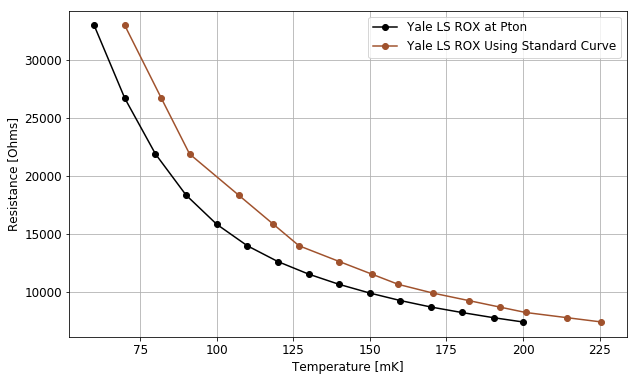

In [51]:
plt.plot(ls_cal_pton, lsrox_res, 'o-', color = 'k', label = "Yale LS ROX at Pton")
plt.plot(lsrox_standardcurve, lsrox_res, 'o-', color = 'sienna', label = "Yale LS ROX Using Standard Curve")
plt.xlabel('Temperature [mK]')
plt.ylabel('Resistance [Ohms]')
plt.legend()
plt.grid()

## Plotting Pre heat sink vs post heat sink LS ROX data

In [52]:
## Post-heatsink (Jan 27, 2021)
bfservo = [50,60,70,80,90,110,110,120,130,140,150,160,170,180,190,200]
lsservo = [52,64,74.6,83.5,92.3,100.8,109.2,118.3,127.3,135.7,144.8,153.7,162.3,170.8,179.5,188.2]

In [53]:
## Pre-heatsink (June 14, 2020)
bfservo_june = [48, 50, 55, 60, 65, 70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]
lsservo_june = [56.1, 57.9, 62.9, 67.6, 72.3, 76.7, 80.9, 85.1, 89.1, 93.4, 97.5, 101.6, 105.5, 110, 114.3, 118.7, 123.1, 127.6, 132.1, 136.5, 140.8, 145.1, 149.7, 154, 158.3, 162.7, 167.1, 171.2, 175.6, 179.9, 184.1, 188.5]

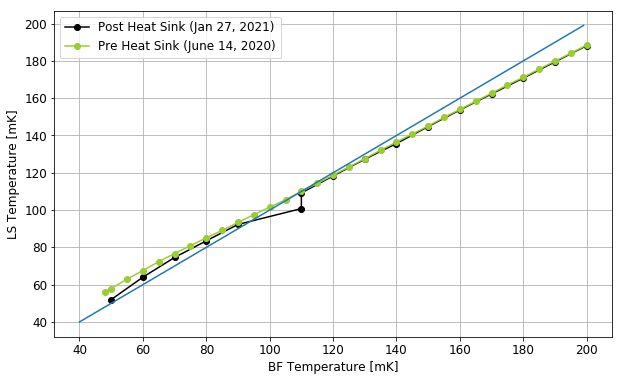

In [54]:
plt.plot(bfservo, lsservo, 'o-', color = 'k', label = 'Post Heat Sink (Jan 27, 2021)')
plt.plot(bfservo_june, lsservo_june, 'o-', color = 'yellowgreen', label = "Pre Heat Sink (June 14, 2020)")
plt.xlabel('BF Temperature [mK]')
plt.ylabel("LS Temperature [mK]")
plt.plot(x,x)
plt.grid()
plt.legend()
#plt.xlim(40,100)
#plt.ylim(40,100)

In [55]:
bfservo = np.array(bfservo)
lsservo = np.array(lsservo)
lsservo_june = np.array(lsservo_june)
bfservo_june = np.array(bfservo_june)

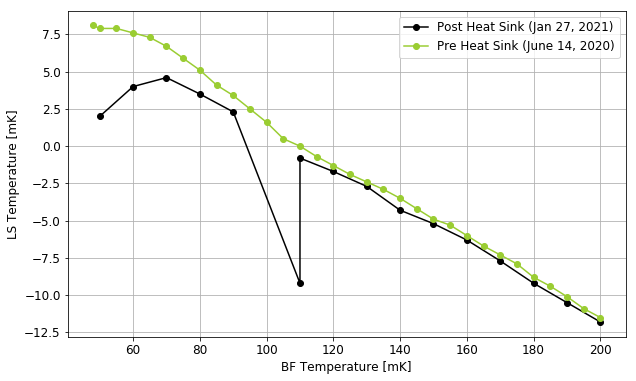

In [74]:
plt.plot(bfservo, lsservo-bfservo, 'o-', color = 'k', label = 'Post Heat Sink (Jan 27, 2021)')
plt.plot(bfservo_june, lsservo_june-bfservo_june, 'o-', color = 'yellowgreen', label = "Pre Heat Sink (June 14, 2020)")
plt.xlabel('BF Temperature [mK]')
plt.ylabel("LS Temperature [mK]")
#plt.plot(x,x)
plt.grid()
plt.legend()
#plt.ylim(-20,10)
#plt.ylim(40,100)

## Plotting Standard Curve Cal file and LS ROX Cal file

In [57]:
standard_curve_file = "/home/sab267/git/thermometer-calibrations/standard/rox/Rx102aMN.340"
lsrox_file = "/home/sab267/git/thermometer-calibrations/standard/rox/U05566.340"

In [58]:
## standard curve
standardcurve_data = np.genfromtxt(standard_curve_file, skip_header = 9)
standardcurve_res = 10**standardcurve_data[:,1]
standardcurve_temp = standardcurve_data[:,2]

##ls rox 
lsrox_data = np.genfromtxt(lsrox_file, skip_header = 9)
lsrox_res = 10**lsrox_data[:,1]
lsrox_temp = lsrox_data[:,2]


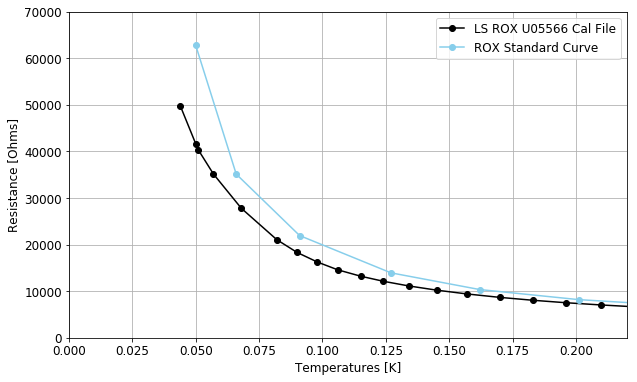

In [59]:
plt.plot(lsrox_temp, lsrox_res, 'o-', color = 'k', label = "LS ROX U05566 Cal File")
plt.plot(standardcurve_temp, standardcurve_res, 'o-', color = 'skyblue', label = "ROX Standard Curve")
plt.grid()
plt.xlabel("Temperatures [K]")
plt.ylabel("Resistance [Ohms]")
plt.xlim(0,.220)
plt.ylim(0,70000)
plt.legend()